# OLM v1 metrics

Capture metrics for both `catalogd` and `operator-controller` pods

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df1 = pd.read_csv('work/olm_v1_metrics-20240717-1606.csv', index_col=0)

In [3]:
df1.loc[:6]

,pod,c0,cpu0,mem0,c1,cpu1,mem1
0,catalogd-controller-manager-7f9766cf5d-cx4gh,manager,888559n,25576Ki,kube-rbac-proxy,35905n,9252Ki
1,operator-controller-controller-manager-9676486...,manager,877422n,16572Ki,kube-rbac-proxy,0,10896Ki
2,catalogd-controller-manager-7f9766cf5d-cx4gh,manager,888559n,25576Ki,kube-rbac-proxy,35905n,9252Ki
3,operator-controller-controller-manager-9676486...,manager,877422n,16572Ki,kube-rbac-proxy,0,10896Ki
4,catalogd-controller-manager-7f9766cf5d-cx4gh,manager,888559n,25576Ki,kube-rbac-proxy,35905n,9252Ki
5,operator-controller-controller-manager-9676486...,manager,877422n,16572Ki,kube-rbac-proxy,0,10896Ki
6,catalogd-controller-manager-7f9766cf5d-cx4gh,manager,888559n,25576Ki,kube-rbac-proxy,35905n,9252Ki


## Operator Controller metrics

In [4]:
df = df1.loc[df1['pod'].str.contains('operator-controller'),['cpu0','cpu1','mem0','mem1']]

In [5]:
cputotal = np.ceil((df.cpu0.str.rstrip('n').astype(int) + df.cpu1.str.rstrip('n').astype('int')) / 1000000).astype(int)

In [6]:
df.insert(4, "cputotal", cputotal, True)

In [7]:
memtotal = np.round((df.mem0.str.rstrip('Ki').astype(int) + df.mem1.str.rstrip('Ki').astype(int)) / 1024).astype(int)

In [8]:
df.insert(5, "memtotal", memtotal, True)

In [9]:
df

,cpu0,cpu1,mem0,mem1,cputotal,memtotal
1,877422n,0,16572Ki,10896Ki,1,27
3,877422n,0,16572Ki,10896Ki,1,27
5,877422n,0,16572Ki,10896Ki,1,27
7,877422n,0,16572Ki,10896Ki,1,27
9,877422n,0,16572Ki,10896Ki,1,27
...,...,...,...,...,...,...
291,1916366n,3694n,42280Ki,8772Ki,2,50
293,1916366n,3694n,42280Ki,8772Ki,2,50
295,1916366n,3694n,42280Ki,8772Ki,2,50
297,1916366n,3694n,42280Ki,8772Ki,2,50


<Axes: title={'center': 'Operator Controller CPU usage'}, xlabel='samples', ylabel='CPU Usage (millicores)'>

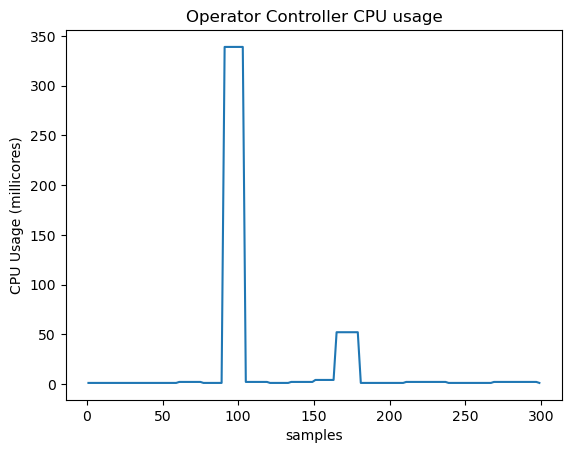

In [10]:
df.cputotal.plot(title='Operator Controller CPU usage', xlabel='samples', ylabel='CPU Usage (millicores)', kind='line')

<Axes: title={'center': 'Operator Controller memory usage'}, xlabel='samples', ylabel='Memory usage (Mi)'>

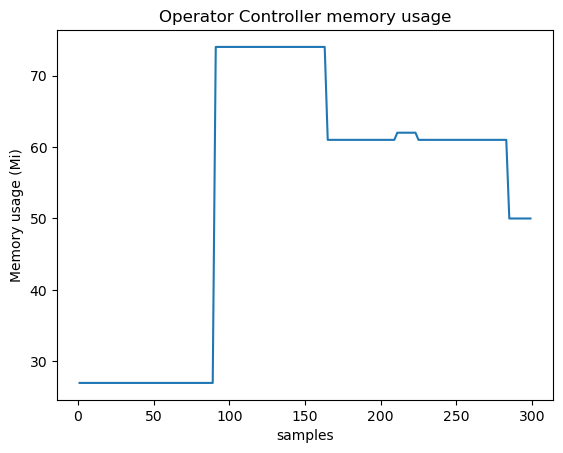

In [11]:
df.memtotal.plot(title='Operator Controller memory usage', kind='line', xlabel='samples', ylabel='Memory usage (Mi)')

In [12]:
df.columns

Index(['cpu0', 'cpu1', 'mem0', 'mem1', 'cputotal', 'memtotal'], dtype='object')

In [13]:
cpu = np.ceil(df.cpu0.str.rstrip('n').astype(int) / 1000000).astype(int)

In [14]:
df.insert(6, "cpu", cpu, True)

In [15]:
mem = np.round(df.mem0.str.rstrip('Ki').astype(int) / 1024).astype(int)

In [16]:
df.insert(7, "mem", mem, True)

In [17]:
df[:5]

,cpu0,cpu1,mem0,mem1,cputotal,memtotal,cpu,mem
1,877422n,0,16572Ki,10896Ki,1,27,1,16
3,877422n,0,16572Ki,10896Ki,1,27,1,16
5,877422n,0,16572Ki,10896Ki,1,27,1,16
7,877422n,0,16572Ki,10896Ki,1,27,1,16
9,877422n,0,16572Ki,10896Ki,1,27,1,16


<Axes: title={'center': 'Memory usage breakdown plot'}, xlabel='samples', ylabel='Memory usage (Mi)'>

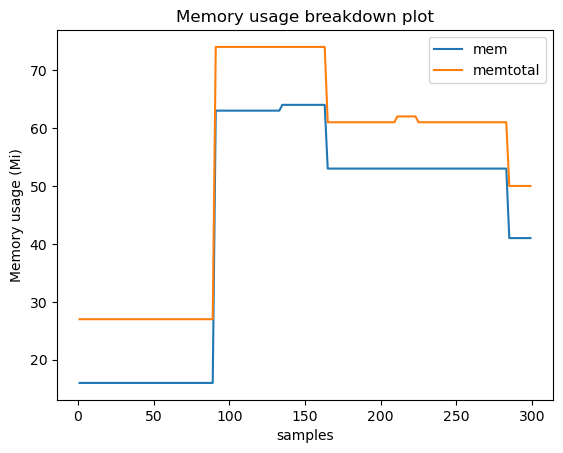

In [18]:
df.plot(y=['mem','memtotal'], title='Memory usage breakdown plot', kind='line', xlabel='samples', ylabel='Memory usage (Mi)')

<Axes: title={'center': 'CPU usage breakdown plot'}, xlabel='samples', ylabel='CPU usage (millicores)'>

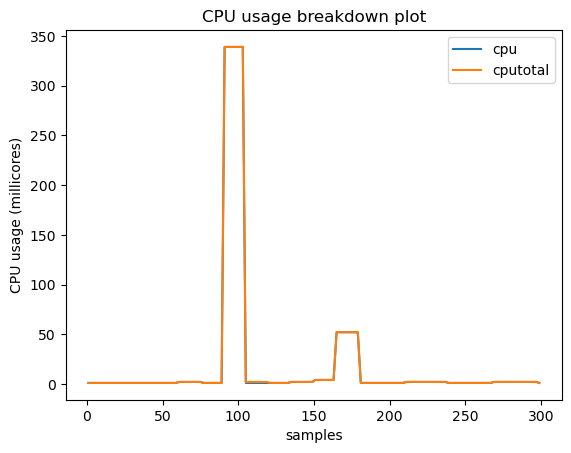

In [19]:
df.plot(y=['cpu','cputotal'], title='CPU usage breakdown plot', kind='line', xlabel='samples', ylabel='CPU usage (millicores)')

## Catalogd metrics

In [20]:
df = None
df = df1.loc[df1['pod'].str.contains('catalogd-controller-manager'),['cpu0','cpu1','mem0','mem1']]

In [21]:
df.insert(4, "cputotal", np.ceil((df.cpu0.str.rstrip('n').astype(int) + df.cpu1.str.rstrip('n').astype('int')) / 1000000).astype(int), True)

In [22]:
df.insert(5, "memtotal", np.round((df.mem0.str.rstrip('Ki').astype(int) + df.mem1.str.rstrip('Ki').astype(int)) / 1024).astype(int), True)

<Axes: title={'center': 'Operator Controller CPU usage'}, xlabel='samples', ylabel='CPU Usage (millicores)'>

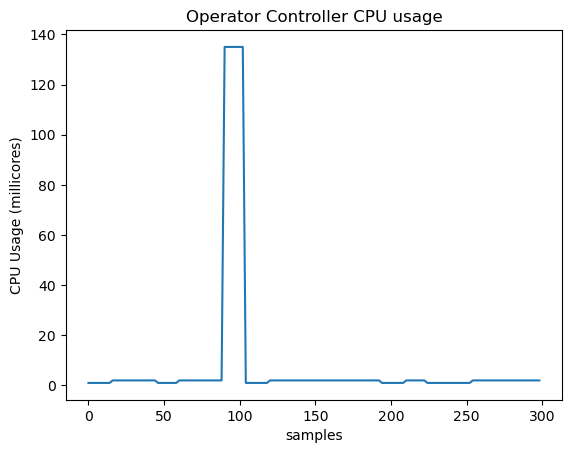

In [23]:
df.cputotal.plot(title='Operator Controller CPU usage', xlabel='samples', ylabel='CPU Usage (millicores)', kind='line')

<Axes: title={'center': 'Memory usage breakdown plot'}, xlabel='samples', ylabel='Memory usage (Mi)'>

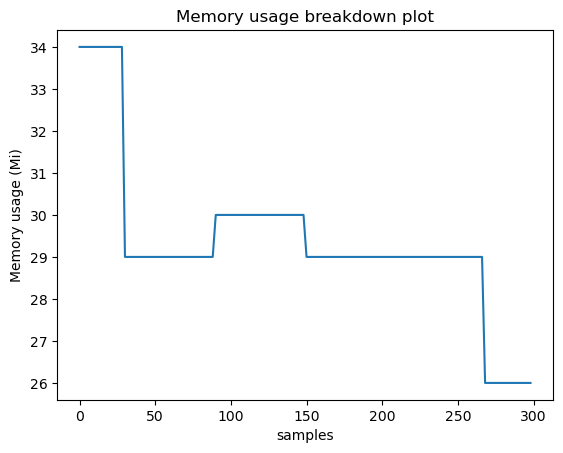

In [24]:
df.memtotal.plot(title='Memory usage breakdown plot', kind='line', xlabel='samples', ylabel='Memory usage (Mi)')

In [25]:
df

,cpu0,cpu1,mem0,mem1,cputotal,memtotal
0,888559n,35905n,25576Ki,9252Ki,1,34
2,888559n,35905n,25576Ki,9252Ki,1,34
4,888559n,35905n,25576Ki,9252Ki,1,34
6,888559n,35905n,25576Ki,9252Ki,1,34
8,888559n,35905n,25576Ki,9252Ki,1,34
...,...,...,...,...,...,...
290,1319206n,23445n,17988Ki,8740Ki,2,26
292,1319206n,23445n,17988Ki,8740Ki,2,26
294,1319206n,23445n,17988Ki,8740Ki,2,26
296,1319206n,23445n,17988Ki,8740Ki,2,26


In [26]:
cpu = np.ceil(df.cpu0.str.rstrip('n').astype(int) / 1000000).astype(int)
df.insert(6, "cpu", cpu, True)

In [27]:
mem = np.round(df.mem0.str.rstrip('Ki').astype(int) / 1024).astype(int)
df.insert(7, "mem", mem, True)

<Axes: title={'center': 'CPU usage breakdown plot'}, xlabel='samples', ylabel='CPU usage (millicores)'>

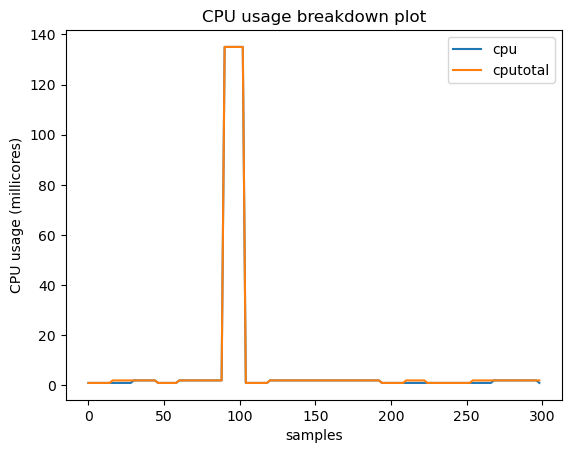

In [28]:
df.plot(y=['cpu','cputotal'], title='CPU usage breakdown plot', kind='line', xlabel='samples', ylabel='CPU usage (millicores)')

<Axes: title={'center': 'Memory usage breakdown plot'}, xlabel='samples', ylabel='Memory usage (Mi)'>

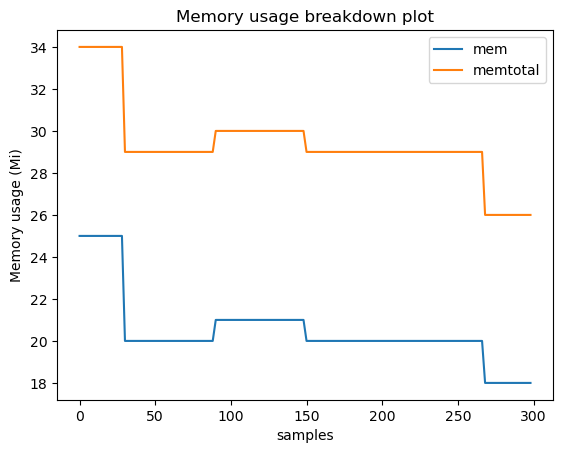

In [29]:
df.plot(y=['mem','memtotal'], title='Memory usage breakdown plot', kind='line', xlabel='samples', ylabel='Memory usage (Mi)')